#### Answers submitted by:  Paul Black 
#### Date:  04/01/2017
---

# Python Part 3:  Pandas Exercises
---

## Q1:  Read in the libraries you need

In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

In [2]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

## Q2:  Set options in pandas so it displays `max_rows` to 10

In [3]:
# set various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.precision', 3)

## Q3:  What versions of `Python` and `pandas` are you running?  



In [4]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.18.0
Numpy version: 1.10.4


In [5]:
# confirming which version of Python I am using
import sys
print("Python Version:", sys.version)

Python Version: 2.7.11 |Anaconda 4.0.0 (64-bit)| (default, Feb 16 2016, 09:58:36) [MSC v.1500 64 bit (AMD64)]


## Q4:  Read in the "olive" dataset that is available in this folder
Description:  572 olive oil samples from 3 different regions (and 9 sub-regions) of Italy; for each sample the normalized concentrations of 8 fatty acids are given.  
Source:  http://www2.chemie.uni-erlangen.de/publications/ANN-book/datasets/oliveoil/

There are 3 regions: 
* South
* North
* Sardinia

There are 9 sub-regions (areas): 
* North Apulia
* South Apulia
* Calabria
* Sicily
* Inland
* Coastal Sardinia
* Umbria
* East
* West Liguria

Supplemental report:  http://www.public.iastate.edu/~dicook/stat503/05/cs-olive.pdf

In [6]:
# read csv data into pandas dataframe
df = pd.read_csv('olive.csv')

## Q5:  How many rows and columns are in this dataframe?

In [11]:
df.shape

(572, 11)

>> There are 572 rows and 11 columns

## Q6:  Print the first 4 rows of the data

In [12]:
df.head(4)

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35


## Q7:  How many different data types are in this dataframe, and what are the data types?

In [13]:
df.dtypes

Unnamed: 0     object
region          int64
area            int64
palmitic        int64
palmitoleic     int64
                ...  
oleic           int64
linoleic        int64
linolenic       int64
arachidic       int64
eicosenoic      int64
dtype: object

>>There are two data types, int and object.

## Q8:  Create a new column
### Copy the column to:  'Unnamed: 0' to 'sub_region_raw'

In [29]:
df['sub_region_raw'] = df['Unnamed: 0']

## Q9:  Rename a column
### 'Unnamed: 0' to:  'sub_region_desc'

In [31]:
df = df.rename(columns = {'Unnamed: 0': 'sub_region_desc'})
df.head()

,sub_region_desc,region,sub_region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,suf_region_raw,sub_region_raw
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29,1.North-Apulia,1.North-Apulia
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29,2.North-Apulia,2.North-Apulia
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29,3.North-Apulia,3.North-Apulia
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35,4.North-Apulia,4.North-Apulia
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46,5.North-Apulia,5.North-Apulia


## Q10:  Rename the column 'area' to:  'sub_region'

In [17]:
 df = df.rename(columns = {'area': 'sub_region'})

## Q11:  How many unique values of 'region' are there?

Hint:  the answer should be 3

In [19]:
len(df['region'].unique())

3

## Q12:  How many unique values of 'sub_region' are there?

Hint:  the answer should be 9

In [20]:
 len(df['sub_region'].unique())

9

## Q13:  How many unique values of 'sub_region_desc' are there?
Hint:  we would like the answer to be 9, but here's where we run into some messy data

In [40]:
df['sub_region_desc'].unique()

9

## Q14:  Looks like 'sub_region_desc' has line numbers attached to the beginning of region name.  We need to do some data cleaning.  Can you remove them?  
```
 	region 	sub_region 	palmitic 	palmitoleic 	stearic 	oleic 	linoleic 	linolenic 	arachidic 	eicosenoic 	sub_region_raw
sub_region_desc 											
1.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
10.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
100.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
101.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
102.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
```

Hint:  check out this link
http://stackoverflow.com/questions/39583264/pandas-strip-numbers-and-parenthesis-from-string
 

In [34]:
 df['sub_region_desc'] = df['sub_region_desc'].apply(lambda x: x.strip('1234567890.'))

In [36]:
#df.head()

In [88]:
 df.head(10)

,sub_region_desc,region,sub_region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,suf_region_raw,sub_region_raw
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29,1.North-Apulia,1.North-Apulia
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29,2.North-Apulia,2.North-Apulia
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29,3.North-Apulia,3.North-Apulia
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35,4.North-Apulia,4.North-Apulia
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46,5.North-Apulia,5.North-Apulia
5,North-Apulia,1,1,911,49,268,7924,678,51,70,44,6.North-Apulia,6.North-Apulia
6,North-Apulia,1,1,922,66,264,7990,618,49,56,29,7.North-Apulia,7.North-Apulia
7,North-Apulia,1,1,1100,61,235,7728,734,39,64,35,8.North-Apulia,8.North-Apulia
8,North-Apulia,1,1,1082,60,239,7745,709,46,83,33,9.North-Apulia,9.North-Apulia
9,North-Apulia,1,1,1037,55,213,7944,633,26,52,30,10.North-Apulia,10.North-Apulia


In [8]:
#df.head()

In [87]:
df[10:20]

,sub_region_desc,region,sub_region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,suf_region_raw,sub_region_raw
10,North-Apulia,1,1,1051,35,219,7978,605,21,65,24,11.North-Apulia,11.North-Apulia
11,North-Apulia,1,1,1036,59,235,7868,661,30,62,44,12.North-Apulia,12.North-Apulia
12,North-Apulia,1,1,1074,70,214,7728,747,50,79,33,13.North-Apulia,13.North-Apulia
13,North-Apulia,1,1,875,52,243,8018,655,41,79,32,14.North-Apulia,14.North-Apulia
14,North-Apulia,1,1,952,49,254,7795,780,50,75,41,15.North-Apulia,15.North-Apulia
15,North-Apulia,1,1,1155,98,201,7606,816,32,60,29,16.North-Apulia,16.North-Apulia
16,North-Apulia,1,1,943,94,183,7840,788,42,75,31,17.North-Apulia,17.North-Apulia
17,North-Apulia,1,1,1278,69,205,7344,957,45,70,28,18.North-Apulia,18.North-Apulia
18,North-Apulia,1,1,961,70,195,7958,742,46,75,30,19.North-Apulia,19.North-Apulia
19,North-Apulia,1,1,952,77,258,7820,736,43,78,33,20.North-Apulia,20.North-Apulia


In [9]:
#df.head()

## Q15:  Try again:  How many unique values of 'sub_region_desc' are there?
Hint:  you should see 9 of them!

In [39]:
 len(df['sub_region_desc'].unique())

9

## Q16:   Create a horizontal frequency barplot for 'region'

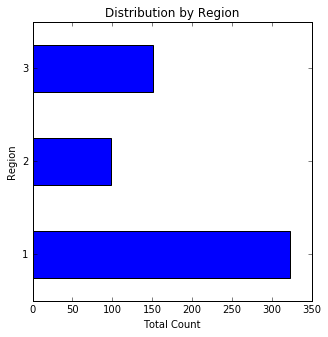

In [59]:
reg_freq = df.groupby('region').size()
reg_freq.plot(kind='barh', figsize=[5,5])
plt.title("Distribution by Region")
plt.ylabel('Region')
plt.xlabel('Total Count')v

## Q17:   Create a horizontal frequency barplot for 'sub_region'

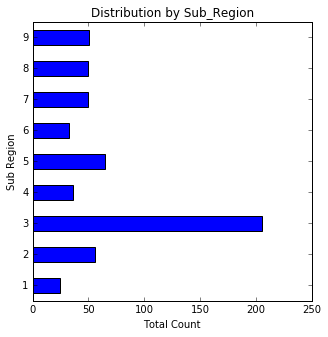

In [75]:
sub_reg_freq = df.groupby('sub_region').size()
sub_reg_freq.plot(kind='barh', figsize=[5,5])
plt.title("Distribution by Sub_Region")
plt.ylabel('Sub Region')
plt.xlabel('Total Count') 


## Q18:   Create a horizontal frequency barplot for 'sub_region_desc'

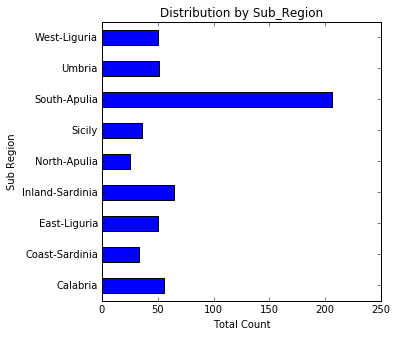

In [78]:
df.groupby('sub_region_desc').size().plot(kind='barh', figsize=[5,5])

plt.title("Distribution by Sub_Region")
plt.ylabel('Sub Region')
plt.xlabel('Total Count') 